(test-functions:damped-oscillator-reliability)=
# Damped Oscillator Reliability

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import uqtestfuns as uqtf

The damped oscillator reliability problem is an eight-dimensional reliability
analysis test function {cite}`DerKiureghian1990, DerKiureghian1991, Bourinet2011, Dubourg2011`.

```{note}
The reliability analysis variant differs from
the {ref}`base model <test-functions:damped-oscillator>`.
The base model computes the mean-square relative displacement of
the secondary spring without reference to the performance of the system.
```

## Test function instance

To create a default instance of the test function:

In [2]:
my_testfun = uqtf.DampedOscillatorReliability()

Check if it has been correctly instantiated:

In [3]:
print(my_testfun)

Name              : DampedOscillatorReliability
Spatial dimension : 8
Description       : Performance function from Der Kiureghian and De Stefano (1990)


## Description

The problem poses the reliability of a damped oscillator system
as defined in {cite}`Igusa1985` (see {ref}`Damped Oscillator <test-functions:damped-oscillator>`).
The reliability of the system depends on the secondary spring as described
by the following performance function {cite}`DerKiureghian1990, Dubourg2011` [^location]:

$$
g(\boldsymbol{x}; p) = F_s - p k_s \mathcal{M}(M_p, M_s, K_p, K_s, \zeta_p, \zeta_s, S_0),
$$

$$
\mathcal{M}(M_p, M_s, K_p, K_s, \zeta_p, \zeta_s, S_0) = \left( \pi \frac{S_0}{4 \zeta_s \omega_s^3} \frac{\zeta_a \zeta_s}{\zeta_p \zeta_s (4 \zeta_a^2 + \theta^2) + \gamma \zeta_a^2} \frac{(\zeta_p \omega_p^3 + \zeta_s \omega_s^3) \omega_p}{4 \zeta_a \omega_a^4} \right)^{0.5}
$$

$$
\begin{aligned}
	\omega_p & = \left( \frac{k_p}{m_p}\right)^{0.5} & \omega_s & = \left(\frac{k_s}{m_s}\right)^{0.5} & \omega_a & = \frac{\omega_p + \omega_s}{2}\\
	\gamma & = \frac{m_s}{m_p} & \zeta_a & = \frac{\zeta_p + \zeta_s}{2} & \theta & = \frac{\omega_p - \omega_s}{\omega_a} \\
\end{aligned}
$$

where $\boldsymbol{x} = \{ M_p, M_s, K_p, K_s, \zeta_p, \zeta_s, S_0, F_s \}$
is the eight-dimensional vector of input variables probabilistically defined
further below and $p$ is a deterministic parameter of the function
(i.e., the peak factor).

The failure state and the failure probability are defined as
$g(\boldsymbol{x}; p) \leq 0$ and $\mathbb{P}[g(\boldsymbol{X}; p) \leq 0]$,
respectively.

## Probabilistic input

Based on {cite}`DerKiureghian1991`, the probabilistic input model
for the damped oscillator reliability consists of eight independent random
variables with marginal distributions shown in the table below.

In [4]:
my_testfun.prob_input

ProbInput(spatial_dimension=8, marginals=(UnivDist(distribution='lognormal', parameters=array([0.40048994, 0.09975135]), name='Mp', description='Primary mass'), UnivDist(distribution='lognormal', parameters=array([-4.61014535,  0.09975135]), name='Ms', description='Secondary mass'), UnivDist(distribution='lognormal', parameters=array([-0.01961036,  0.1980422 ]), name='Kp', description='Primary spring stiffness'), UnivDist(distribution='lognormal', parameters=array([-4.62478054,  0.1980422 ]), name='Ks', description='Secondary spring stiffness'), UnivDist(distribution='lognormal', parameters=array([-3.06994228,  0.38525317]), name='Zeta_p', description='Primary damping ratio'), UnivDist(distribution='lognormal', parameters=array([-4.02359478,  0.47238073]), name='Zeta_s', description='Secondary damping ratio'), UnivDist(distribution='lognormal', parameters=array([4.60019502, 0.09975135]), name='S0', description='White noise base acceleration'), UnivDist(distribution='lognormal', parameters=array([2.70307504, 0.09975135]), name='Fs', description='Force capacity of the secondary spring')), copulas=None, name='DampedOscillatorReliability-DerKiureghian1990a', description='Input model #1 for the damped oscillator reliability from Der Kiureghian and De Stefano (1990)')

In the literature, the force capacity of the secondary spring (i.e., $F_s$)
have different probabilistic specifications as summarized in the table below.

|                  $F_S$                   |            Keyword             |          Source           |  
|:----------------------------------------:|:------------------------------:|:-------------------------:|
| $\mathcal{N}_{\mathrm{log}}(15.0, 1.50)$ | `DerKiureghian1990a` (default) | {cite}`DerKiureghian1990` |
| $\mathcal{N}_{\mathrm{log}}(21.5, 2.15)$ |      `DerKiureghian1990b`      | {cite}`DerKiureghian1990` |
| $\mathcal{N}_{\mathrm{log}}(27.5, 2.75)$ |      `DerKiureghian1990c`      | {cite}`DerKiureghian1990` |

Note that the parameters of the log-normal distribution given above correspond
to the mean and standard deviation of the log-normal distribution
(and not the mean and standard deviation of the underlying normal distribution).

With the higher mean of $F_s$, the failure probability becomes smaller.

## Parameters

The performance function contains a single parameter (peak factor).
From {cite}`DerKiureghian1991` this parameter is set to $3$.

## Reference results

This section provides several reference results of typical UQ analyses involving
the test function.

### Sample histogram

Shown below is the histogram of the output based on $10^6$ random points:

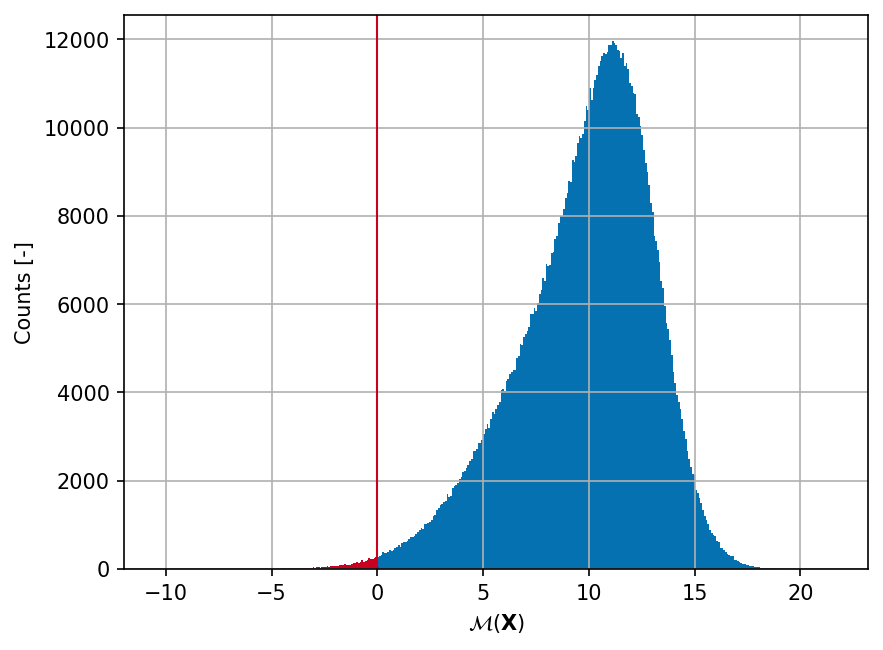

In [5]:
xx_test = my_testfun.prob_input.get_sample(1000000)
yy_test = my_testfun(xx_test)
idx_pos = yy_test > 0
idx_neg = yy_test <= 0

hist_pos = plt.hist(yy_test, bins="auto", color="#0571b0")
plt.hist(yy_test[idx_neg], bins=hist_pos[1], color="#ca0020")
plt.axvline(0, linewidth=1.0, color="#ca0020")

plt.grid()
plt.ylabel("Counts [-]")
plt.xlabel("$\mathcal{M}(\mathbf{X})$")
plt.gcf().set_dpi(150);

### Failure probability

Some reference values for the failure probability $P_f$ and from the literature
are summarized in the table below ($\mu_{F_s}$ is the log-normal distribution
mean of $F_s$).

| $\mu_{F_s}$ |          Method          |       $N$       |      $\hat{P}_f$      | $\mathrm{CoV}[\hat{P}_f]$ |                 Source                  |
|:-----------:|:------------------------:|:---------------:|:---------------------:|:-------------------------:|:---------------------------------------:|
|    $15$     |       {term}`FORM`       |     $1'179$     | $2.19 \times 10^{-2}$ |          &#8212;          | {cite}`DerKiureghian1990, Bourinet2011` |
|             |        {term}`SS`        | $3 \times 10^5$ | $4.63 \times 10^{-3}$ |          $< 3\%$          |           {cite}`Dubourg2011`           |
|             |    Meta-IS[^meta-is]     |   $464 + 600$   | $4.80 \times 10^{-3}$ |          $< 5\%$          |           {cite}`Dubourg2011`           |
|             | {term}`SVM` + {term}`SS` |     $1'719$     | $4.78 \times 10^{-3}$ |          $< 4\%$          |          {cite}`Bourinet2011`           |
|   $21.5$    |       {term}`FORM`       |     $2'520$     | $3.50 \times 10^{-4}$ |          &#8212;          | {cite}`DerKiureghian1990, Bourinet2011` |
|             |        {term}`SS`        | $5 \times 10^5$ | $4.75 \times 10^{-5}$ |          $< 4\%$          |           {cite}`Dubourg2011`           |
|             |     Meta-{term}`IS`      |   $336 + 400$   | $4.46 \times 10^{-5}$ |          $< 5\%$          |           {cite}`Dubourg2011`           |
|             | {term}`SVM` + {term}`SS` |     $2'865$     | $4.42 \times 10^{-5}$ |          $< 7\%$          |          {cite}`Bourinet2011`           |
|   $27.5$    |       {term}`FORM`       |     $2'727$     | $3.91 \times 10^{-6}$ |          &#8212;          | {cite}`DerKiureghian1990, Bourinet2011` |
|             |        {term}`SS`        | $7 \times 10^5$ | $3.47 \times 10^{-7}$ |          $< 5\%$          |           {cite}`Dubourg2011`           |
|             |         Meta-IS          |   $480 + 200$   | $3.76 \times 10^{-7}$ |          $< 5\%$          |           {cite}`Dubourg2011`           |
|             | {term}`SVM` + {term}`SS` |     $4'011$     | $3.66 \times 10^{-7}$ |         $< 10\%$          |          {cite}`Bourinet2011`           |

Note that in the table above the total number of model evaluations for
metamodel-based Importance Sampling (Meta-IS) is the sum of training runs
and the correction runs {cite}`Dubourg2011`.

## References

```{bibliography}
:style: unsrtalpha
:filter: docname in docnames
```

[^location]: see, for instance, 
Eqs. (5.5) and (5.7), pp. 184-185 in {cite}`Dubourg2011`.

[^meta-is]: Metamodel-based Importance Sampling